<a href="https://colab.research.google.com/github/vedantpatil10/MegaProjectCarParking/blob/main/MegaProject1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pvedant076","key":"07509acee2c3405af8643db8566a81e1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d pvedant076/car-park-busy-free

 96% 67.0M/69.4M [00:05<00:00, 21.4MB/s]
100% 69.4M/69.4M [00:05<00:00, 14.2MB/s]


In [5]:
import zipfile
zip_ref= zipfile.ZipFile('/content/car-park-busy-free.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
# generators
# training
train_ds= tf.keras.utils.image_dataset_from_directory(
    directory= '/content/car-park-dataset1/carpark_dataset/training_set',
    labels='inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size=(256,256)
)

# testing
validation_ds= tf.keras.utils.image_dataset_from_directory(
    directory= '/content/car-park-dataset1/carpark_dataset/test_set',
    labels='inferred',
    label_mode= 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 16240 files belonging to 2 classes.
Found 2810 files belonging to 2 classes.


In [8]:
# Create CNN model

model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3) , padding ='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))




In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# now we train our model on our data
history=model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
508/508 [==============================] - 64s 100ms/step - loss: 1.3268 - accuracy: 0.9071 - val_loss: 4.4014 - val_accuracy: 0.9363
Epoch 2/10
508/508 [==============================] - 50s 98ms/step - loss: 0.2884 - accuracy: 0.9398 - val_loss: 1.7965 - val_accuracy: 0.9922
Epoch 3/10
508/508 [==============================] - 50s 98ms/step - loss: 0.1545 - accuracy: 0.9612 - val_loss: 1.0437 - val_accuracy: 0.8566
Epoch 4/10
508/508 [==============================] - 50s 98ms/step - loss: 0.1019 - accuracy: 0.9720 - val_loss: 1.6144 - val_accuracy: 0.9018
Epoch 5/10
508/508 [==============================] - 50s 98ms/step - loss: 0.1508 - accuracy: 0.9746 - val_loss: 4.5710 - val_accuracy: 0.7270
Epoch 6/10
508/508 [==============================] - 50s 97ms/step - loss: 0.0761 - accuracy: 0.9791 - val_loss: 3.3597 - val_accuracy: 0.9028
Epoch 7/10
508/508 [==============================] - 50s 97ms/step - loss: 0.0326 - accuracy: 0.9881 - val_loss: 5.5121 - val_accuracy

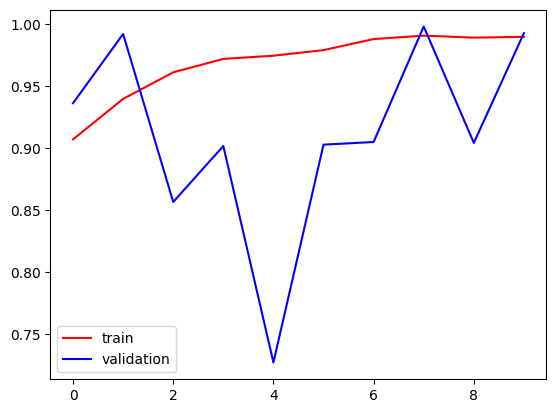

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color= 'red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

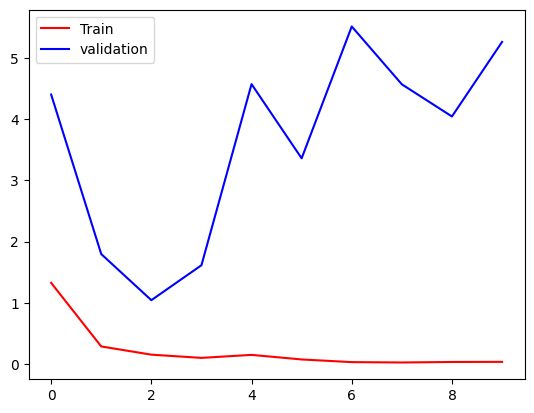

In [13]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [14]:
import cv2

In [21]:
# importing image
test_img= cv2.imread('/content/final-test-busy.jpeg')

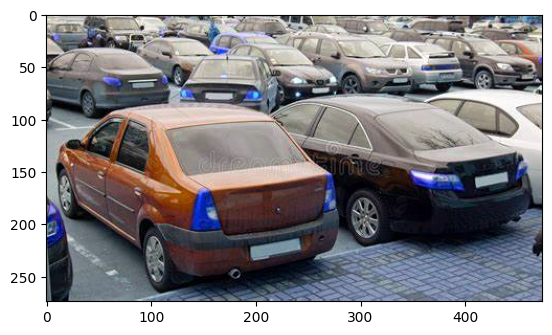

In [22]:
# display image
plt.imshow(test_img)

In [23]:

test_img.shape

(274, 474, 3)

In [24]:
# resizing image to (256,256)
test_img=cv2.resize(test_img,(256,256))

In [25]:
# reshaping input size because we have trained model to take batch of 32 inputs at a time
# and here we are providing only one input
test_input= test_img.reshape((1,256,256,3))

In [26]:
# predicting
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)